In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import openpyxl
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt 
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import warnings
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

In [3]:
datos = pd.read_excel('/home/erick_castro/Documentos/Inteligencia/Datos.xlsx', sheet_name = "Hoja1")
datos = pd.DataFrame(datos)
datos = datos.dropna(axis = 0, how ="any")
datos.head(10)

,Evento,A1,D1,AI1,MI1,CI1,A2,D2,AI2,MI2,...,SM40,SM60,SM80,SM100,24PA1,24PA2,48PA1,48PA2,MAXD,INITIALQ
0,Evento 1,16.382445,55,17.871758,399.148547,27.132184,12.66,55,13.810909,93.850000,...,0.490273,0.519179,0.535343,0.503777,16.382445,13.0,19.460113,13.4,17.246332,6.854821
1,Evento 2,15.827108,35,27.132184,312.330000,27.132184,14.80,40,22.200000,84.375000,...,0.495030,0.524897,0.540182,0.506062,56.089048,50.2,56.089048,50.2,20.280403,7.080917
2,Evento 3,54.700705,1125,2.917371,138.830000,11.285883,47.00,1125,2.506667,109.375000,...,0.505497,0.537286,0.552282,0.514057,56.089048,50.2,56.089048,50.2,30.667560,7.092906
3,Evento 4,13.883428,105,7.933387,86.771423,7.933387,12.40,95,7.831579,28.125000,...,0.515011,0.553487,0.572852,0.534618,1.000000,1.0,1.000000,1.0,15.663358,9.328517
4,Evento 5,5.553371,60,5.553371,104.125708,8.554286,5.00,50,6.000000,21.875000,...,0.545459,0.576360,0.598261,0.557462,23.324159,18.2,60.809413,50.8,16.910000,13.085455
5,Evento 6,24.434833,340,4.312029,173.542846,15.202500,23.40,400,3.510000,44.791667,...,0.520720,0.559205,0.581322,0.542613,3.332023,2.8,3.332023,2.8,23.893522,11.809956
6,Evento 7,3.054354,55,3.332023,69.417139,6.000000,2.80,65,2.584615,11.458333,...,0.535944,0.576360,0.598261,0.550609,26.656181,24.2,29.988204,27.0,14.280000,12.886883
7,Evento 8,19.436799,85,13.720093,312.370000,27.600000,15.40,45,20.533333,66.666650,...,0.528332,0.568736,0.594631,0.551751,20.269804,19.2,46.925986,43.4,36.390000,13.014717
8,Evento 9,5.275703,25,12.661686,69.417139,12.661686,5.00,35,8.571429,25.000000,...,0.537847,0.578266,0.600681,0.560889,9.718399,9.0,29.988204,28.2,16.530000,13.709470
9,Evento 10,3.609691,50,4.331629,34.708569,4.980000,3.40,65,3.138462,8.333333,...,0.541653,0.579219,0.601891,0.560889,9.718399,9.0,29.988204,28.2,17.006422,14.355421


In [4]:
MAXD = datos[['MAXD']]
Expl= pd.DataFrame(datos[['A2', '48PA2']])

In [6]:
train_sizes = [10, 50, 70, 90, 100,125,150,170,190,200]

In [7]:
features = ['A2', '48PA2']
target = 'MAXD'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = KNeighborsRegressor(n_neighbors=7),
X = datos[features],
y = datos[target], train_sizes = train_sizes, cv = 100,
scoring = 'neg_mean_squared_error')

In [8]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[ -61.41623615  -54.57227614  -35.52834123  -45.46686086  -45.71339029
   -45.71339029  -45.71339029  -45.71339029  -45.71339029  -45.71339029
   -45.71339029  -45.71339029  -45.71339029  -45.71339029  -45.71339029
   -45.71339029  -45.71339029  -45.71339029  -45.71339029  -45.71339029
   -45.71339029  -45.71339029  -45.71339029  -45.71339029  -45.71339029
   -45.71339029  -45.71339029  -45.71339029  -45.71339029  -45.71339029
   -45.71339029  -45.71339029  -45.71339029  -45.71339029  -45.71339029
   -45.71339029  -45.71339029  -45.71339029  -45.71339029  -45.71339029
   -45.71339029  -45.71339029  -45.71339029  -45.71339029  -45.71339029
   -45.71339029  -45.71339029  -45.71339029  -45.71339029  -45.71339029
   -45.71339029  -45.71339029  -45.71339029  -45.71339029  -45.71339029
   -45.71339029  -45.71339029  -45.71339029  -45.71339029  -45.71339029
   -45.71339029  -45.71339029  -45.71339029  -45.71339029  -45.71339029
   -45.71339029  -45.71339029  -45.71339029  

In [9]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 10      45.854692
50     116.697014
70      86.876539
90      68.117009
100     61.383159
125     86.394126
150    335.176004
170    309.955505
190    288.203131
200    277.770561
dtype: float64

 --------------------

Mean validation scores

 10     966.762837
50     606.906535
70     606.360297
90     594.575178
100    566.529646
125    496.904737
150    459.133488
170    464.521054
190    463.375799
200    462.329599
dtype: float64


The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


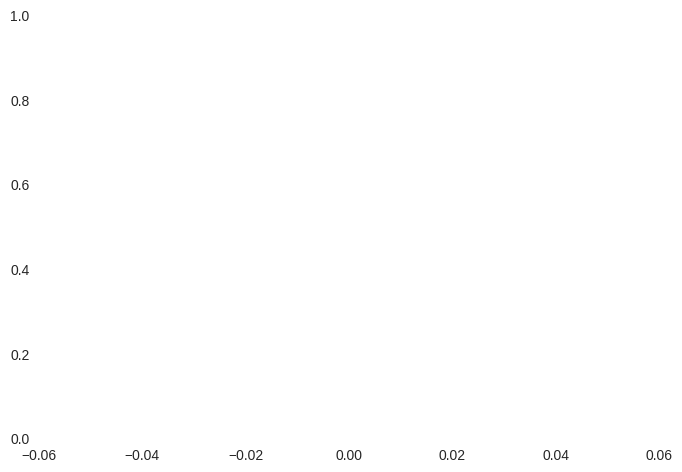

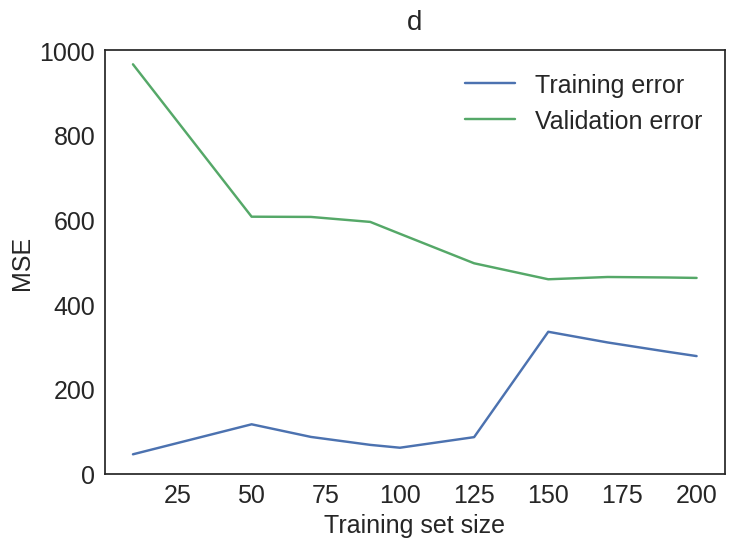

In [10]:
plt.style.use('seaborn')
ax = plt.axes()
ax.set_facecolor("white")
ax.set_xmargin(0.1)
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig, ax = plt.subplots()
plt.grid(b=False, which='major')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 18)
plt.xlabel('Training set size', fontsize = 18)
plt.title('d', fontsize = 20, y = 1.03)
plt.legend(fontsize=18)
plt.ylim(0,1000)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig("learning_curve_k_Ne_normal.jpg", dpi = 500)

/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwarg

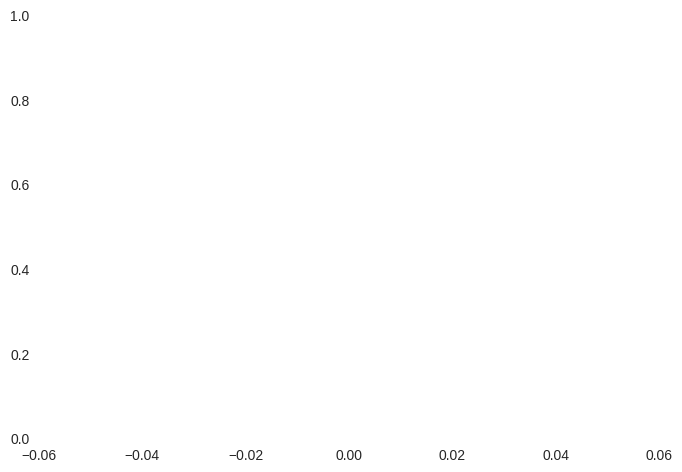

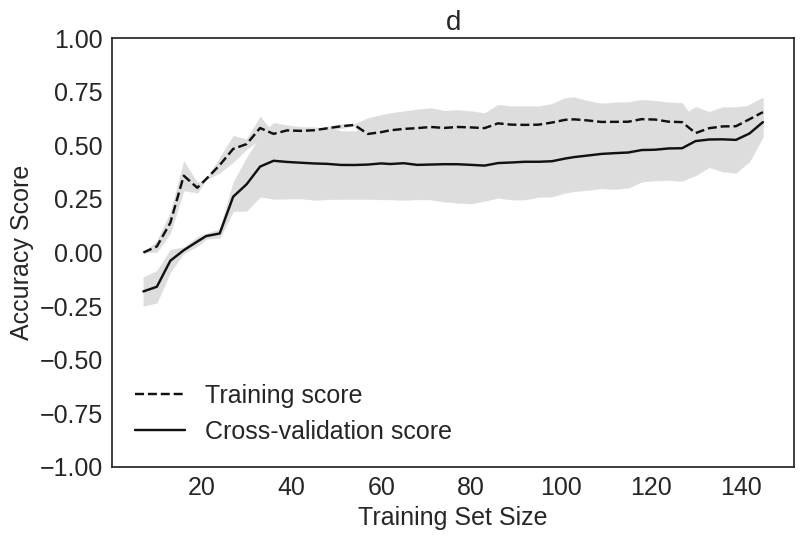

In [11]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsRegressor(n_neighbors=7), Expl , MAXD,cv=3, scoring='r2', n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

ax = plt.axes()
ax.set_facecolor("white")
ax.set_xmargin(0.1)
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig, ax = plt.subplots()
plt.grid(b=False, which='major')

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("d", fontsize = 20)
plt.xlabel("Training Set Size", fontsize=18), plt.ylabel("Accuracy Score", fontsize=18), plt.legend(loc="best", fontsize=18)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.tight_layout()
plt.ylim(-1, 1)
plt.savefig("bias_variance_k_Ne_normal.jpg", dpi = 500)

In [12]:
kfold = ShuffleSplit(n_splits=30, test_size=0.3, random_state=1)
model = KNeighborsRegressor(n_neighbors=7)
results = cross_val_score(model, Expl,MAXD, cv=kfold, scoring='r2')
print(results)
print(results.mean())
print(results.std())

[0.63361246 0.48903119 0.65351378 0.73197594 0.63069854 0.43620515
 0.65616004 0.50896487 0.70027667 0.7050128  0.50852223 0.66168791
 0.63304105 0.71061681 0.70906048 0.70626169 0.73107197 0.73874669
 0.71358992 0.61123061 0.53381066 0.6917584  0.60479198 0.48615093
 0.53855529 0.72362061 0.67552085 0.66871762 0.50482636 0.68154729]
0.6326193603622076
0.08779194670137894


In [13]:
X_train,X_test, y_train,y_test = train_test_split(Expl,MAXD, random_state=1)
lr=KNeighborsRegressor(n_neighbors=7)
lr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [14]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.639507277601767
Test score: 0.6277735338506258
